# Data Preprocessing Reporting
By Ivan Woogue and Erik Celdran

To be discussed:
1. Non-linear Transformation
2. Categorical Encoding
3. Discretization

By the end of the discussion, we will be able to answer the following questions:
1. What are the different Non-Linear Transformations?
2. What are Categorical Encoding and Discretization?
2. When to do Non-Linear Transformation, Categorical Encoding, or Discretization?
3. What's the difference between Categorical Encoding and Discretization?

# Non-linear Transformation

## Main purpose:
 1. transform raw nonlinear data to make it more linear
 2. achieve linearity

## What is meant by transform?
 - Use a mathematical operation to change the measurement scale of a variable

## Why is transformation necessary?
 - Use linear regression techniques more effectively with nonlinear data

## Key Difference between Linear and Nonlinear Transformation:
 1. Linear => preserves the relationship or correlation between variables \
    Ex: multiplying x by a constant, dividing x by a constant or adding a constant to x
 2. Nonlinear => changes (increases or decreases) the relationship or correlation between variables \
    Ex: square root of x or reciprocal of x

In regression, a transformation to achieve linearity is a special kind of nonlinear transformation. \
It is a nonlinear transformation that **increases** the linear relationship between two variables.

##How to perform non-linear transformations to achieve linearity?
 1. Conduct a standard regression analysis on the raw data
 2. Construct a residual plot \
    residual = actual - predicted
 3. If plot pattern is random, \
    True => do not transform data \
    False => continue
 3. Compute the coefficient of determination (R2)
 4. Choose a transformation method
 5. Transform the required variable
 6. Conduct a regression analysis, using the transformed variables
 7. Compute the coefficient of determination (R2), based on the transformed variables.
 8. If the tranformed R2 is greater than the raw-score R2 \
    True => successful \
    False => try a different transformation method

Note: Transformation is a multi-step, trial-and-error process.

## Nonlinear Transformation Techniques

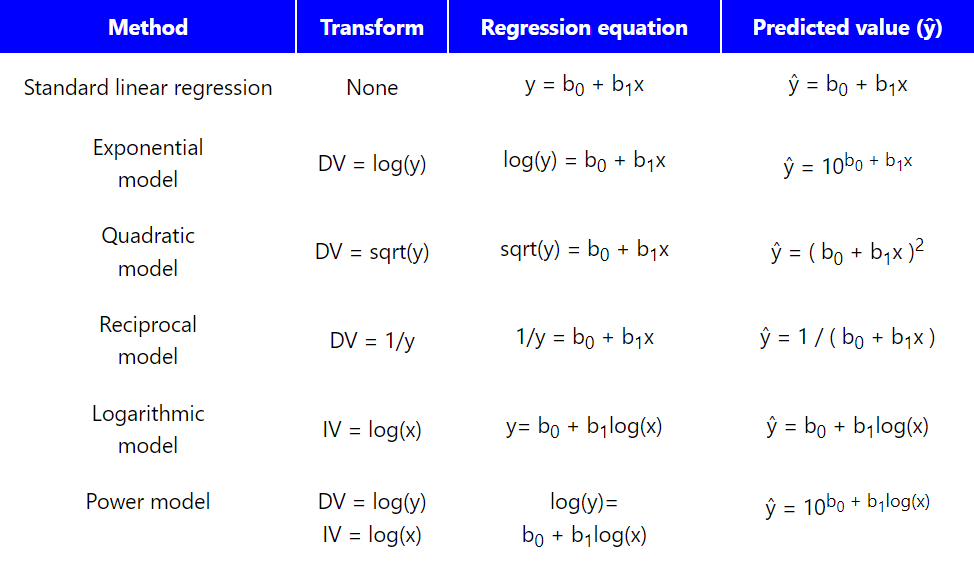

Legend: \
DV or y = dependent variable \
IV or x = independent variable \
b0 = y-intercept of transformation regression line \
b1 = slope of transformation regression line \

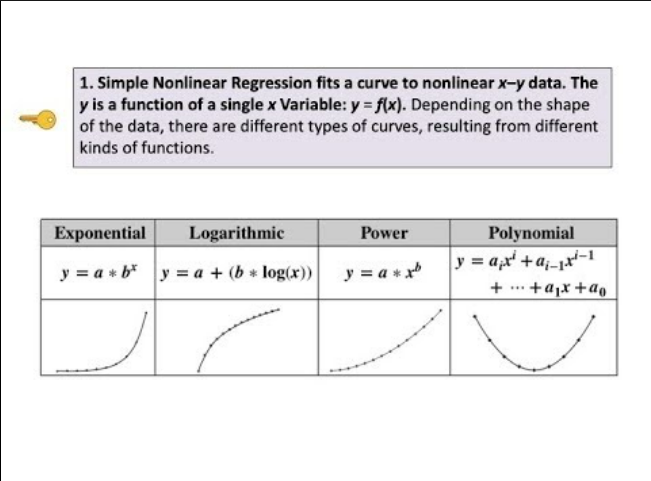

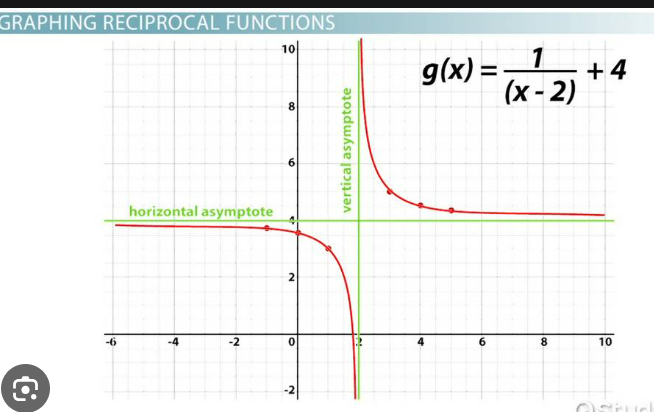

## Sample practical applications

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy.stats import linregress
from sklearn.metrics import r2_score

In [ ]:
# Generating exponential data
initial_val = 1.0
growth_rate = 0.5

x = np.linspace(1, 10, 100)
y = initial_val * np.exp(growth_rate * x)

In [ ]:
# Get slope and intercept
slope, intercept, rvalue, pvalue, stderr = linregress(x, y)

# Predict using the linear regression equation
y_pred = slope * x + intercept

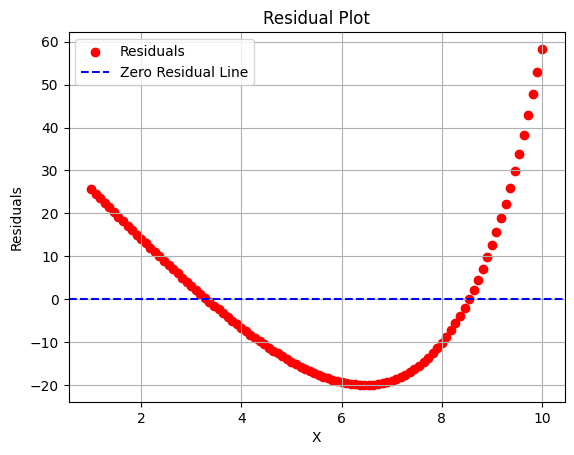

In [ ]:
residual = y - y_pred

# Residual plot
plt.scatter(x, residual, c='red', label='Residuals')
plt.axhline(y=0, color='blue', linestyle='--', label='Zero Residual Line')
plt.xlabel('X')
plt.ylabel('Residuals')
plt.legend()
plt.title('Residual Plot')
plt.grid(True)
plt.show()

In [ ]:
r2 = r2_score(y, y_pred)
print(f"The coefficient of determination or r squared is {r2}")

The coefficient of determination or r squared is 0.7676340911740404


In [ ]:
# Get slope and intercept
y_log = np.log(y)
slope, intercept, rvalue, pvalue, stderr = linregress(x, y_log)

# Predict using the modified equation that is suitable for nonlinear data
y_pred = np.exp(intercept) * np.exp(slope * x)

# Compute r2 again
r2 = r2_score(y, y_pred)
print(f"The coefficient of determination or r squared is {r2}")

The coefficient of determination or r squared is 1.0


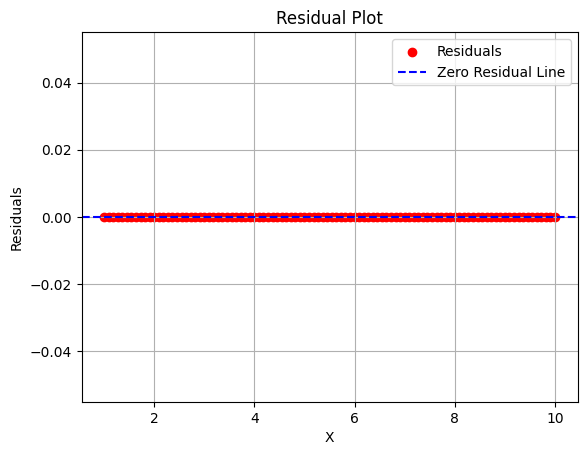

In [ ]:
# Get residuals (actual - predicted)
residuals = y - y_pred

# Residual plot
plt.scatter(x, residuals, c='red', label='Residuals')
plt.axhline(y=0, color='blue', linestyle='--', label='Zero Residual Line')
plt.xlabel('X')
plt.ylabel('Residuals')
plt.legend()
plt.title('Residual Plot')
plt.grid(True)
plt.show()

## References:
[Transformations in Regression
](https://stattrek.com/regression/linear-transformation#:~:text=A%20nonlinear%20transformation%20changes%20(increases,or%20the%20reciprocal%20of%20x.) \

[Transforming nonlinear data | More on regression | AP Statistics | Khan Academy
](https://www.youtube.com/watch?v=A1H4j97paI4) \

[Residual plots | Exploring bivariate numerical data | AP Statistics | Khan Academy
](https://www.youtube.com/watch?v=VamMrPZ-8fc)

# Categorical Encoding

*   Encoding categorical data is a process of converting categorical data into integer format so that the data with converted categorical values can be provided to the models to give and improve the predictions.
*   Categorical data can be considered as gathered information that is divided into groups.

**Examples**

*   Blood type
*   Car Brands

**Types of Categorical Data**

*   Nominal Data - string/text, no numerical value (eg. Brand Names)
*   Ordinal Data - data in an order or scale (eg. placement in a contest)

## Ways to encode Categorical Data


1.   **Label Encoding/Ordinal Encoding**

> In Label encoding, each label is converted into an integer value
*   We use this categorical data encoding technique when the features are ordinal


In [ ]:
!pip install category_encoders
!pip install feature_engine

In [ ]:
import category_encoders as ce
import pandas as pd
df=pd.DataFrame({'height':['tall','medium','short','tall','medium','short','tall','medium','short',]})

# create object of Ordinalencoding
encoder= ce.OrdinalEncoder(cols=['height'],return_df=True,
                           mapping=[{'col':'height',
'mapping':{'None':0,'tall':1,'medium':2,'short':3}}])

#Original data and
#Transformed
df['transformed'] = encoder.fit_transform(df)
print(df)

   height  transformed
0    tall            1
1  medium            2
2   short            3
3    tall            1
4  medium            2
5   short            3
6    tall            1
7  medium            2
8   short            3



2.   **One-Hot Encoding**

>  In one hot encoding, for each level of a categorical feature, we create a new variable. Each category is mapped with a binary variable containing either 0 or 1.
*   We use this categorical data encoding technique when the features are nominal.
*   These newly created binary features are known as Dummy variables.




In [ ]:
df=pd.DataFrame({'Car':[
'Toyota','Hyundai','Honda','Tesla','Chevrolet','Honda'
]})

encoder=ce.OneHotEncoder(cols='Car',handle_unknown='return_nan',return_df=True,use_cat_names=True)

#Original Data
print(df)

#Fit and transform Data
df_encoded = encoder.fit_transform(df)
print(df_encoded)

         Car
0     Toyota
1    Hyundai
2      Honda
3      Tesla
4  Chevrolet
5      Honda
   Car_Toyota  Car_Hyundai  Car_Honda  Car_Tesla  Car_Chevrolet
0         1.0          0.0        0.0        0.0            0.0
1         0.0          1.0        0.0        0.0            0.0
2         0.0          0.0        1.0        0.0            0.0
3         0.0          0.0        0.0        1.0            0.0
4         0.0          0.0        0.0        0.0            1.0
5         0.0          0.0        1.0        0.0            0.0



3.   **Base N Encoding**

> * In the numeral system, the base or the radix is the number of digits or a combination of digits and letters used to represent the numbers.
*   In base N encoding if the base is for example, 5, then the encoder will convert categories into the numerical form using 0-4.



In [ ]:
#Create the dataframe
df=pd.DataFrame({'Car':[
'Toyota','Hyundai','Honda','Tesla','Chevrolet','Honda','Toyota','Hyundai'
]})

#Create an object for Base N Encoding
encoder= ce.BaseNEncoder(cols=['Car'],return_df=True,base=5)

#Original Data
print(df)

#Fit and Transform Data
df_encoded=encoder.fit_transform(df)
print(df_encoded)

## References:
[What is Categorical Data
](https://www.analyticsvidhya.com/blog/2020/08/types-of-categorical-data-encoding/) \

[A Complete Guide to Categorical Data Encoding
](https://analyticsindiamag.com/a-complete-guide-to-categorical-data-encoding/) \

[Categorical Data Encoding Techniques
](https://medium.com/aiskunks/categorical-data-encoding-techniques-d6296697a40f)

# Discretization



*   the process of converting continuous data into discrete buckets by grouping it.
*   known for easy maintainability of the data

> Training a model with discrete data becomes faster and more effective than when attempting the same with continuous data because the huge amounts of data can slow the model down.

**Advantages**

- Simplifies analysis: By dividing continuous data into categories, we can simplify our analysis and make it easier to understand.
- Reduces noise: Discretization can reduce the effects of noise and outliers in the data.
- Improves performance: Some machine learning algorithms perform better with discretized data.

**Disadvantages**
- Information loss: Discretization can lead to information loss, as we are converting continuous data into discrete categories.
- Overfitting: Discretization can lead to overfitting, where the model is too complex and fits the training data too closely.


**Two Types of Discretization**

*   Unsupervised Discretization

> This type of discretization considers only the attribute being discretized and does not use class information.
2 common methods are:

  >- Equal Width Binning
  >>bins have equal width with a range of each bin are defined as `[min + w], [min + 2w] …. [min + nw]` where `w = (max – min) / (no of bins)`

  >- Equal Frequency Binning
  >> The algorithm divides the data into *k* groups which each group contains approximately same number of values.

 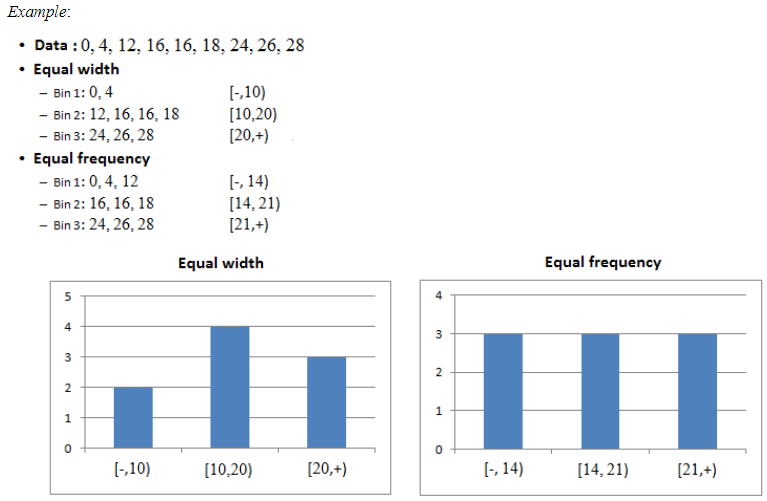



*   Supervised Discretization

> This type of discretization considers the class value and will divide the continuous attributes in such a way so that it provides maximum information about the class.

  >- Decision Tree Descritization
  >> divides the numerical variable into groups estimated by a decision tree. In other words, the bins are the predictions made by a decision tree.
  >>it is more likely that the interval boundaries (split-points) are defined to occur in places that may help improve classification accuracy
---



**Equal Width Binning**



In [ ]:
%pip install feature_engine

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from feature_engine.discretisation import EqualWidthDiscretiser

In [ ]:
df=pd.DataFrame({'Money':[
5, 10, 11, 13, 15, 35, 50, 55, 72, 92, 204, 215
]})

num_bins = 3
# bin_edges = [10, 20, 30, 50]

In [ ]:
# Perform equal-width discretization using pandas
df['Bin'] = pd.cut(df['Money'], bins=num_bins, labels=False)

In [ ]:
df

,Money,Bin
0,5,0
1,10,0
2,11,0
3,13,0
4,15,0
5,35,0
6,50,0
7,55,0
8,72,0
9,92,1


In [ ]:
# Using Python library feature_engine.discretisation
# Create an instance of EqualWidthDiscretiser with the desired number of bins
equal_width_discretizer = EqualWidthDiscretiser(bins=num_bins, variables=['Money'])

# Fit and transform the data
df = equal_width_discretizer.fit_transform(df)

df

,Money,Bin
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,1,1


**Equal Frequency Binning**


In [ ]:
df=pd.DataFrame({'Money':[
5, 10, 11, 13, 15, 35, 50, 55, 72, 92, 204, 215
]})

df['Bin'] = pd.qcut(df['Money'],q=3,labels=["poor","middle","rich"])
df

,Money,Bin
0,5,poor
1,10,poor
2,11,poor
3,13,poor
4,15,middle
5,35,middle
6,50,middle
7,55,middle
8,72,rich
9,92,rich


In [ ]:
# Using Python library feature_engine.discretisation
from feature_engine.discretisation import EqualFrequencyDiscretiser
# Create an instance of EqualWidthDiscretiser with the desired number of bins
df=pd.DataFrame({'Money':[
5, 10, 11, 13, 15, 35, 50, 55, 72, 92, 204, 215
]})

equal_frequency_discretizer = EqualFrequencyDiscretiser(q=3, variables=['Money'])

# Fit and transform the data
df = equal_frequency_discretizer.fit_transform(df)

df

,Money
0,0
1,0
2,0
3,0
4,1
5,1
6,1
7,1
8,2
9,2


## Supervised Discretization
**Decision Tree**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/MyDrive/4103reporting-datapreprocessing')

In [ ]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from feature_engine.discretisation import DecisionTreeDiscretiser
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('data.csv')
df = df[['price', 'bedrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above']]
df

,price,bedrooms,sqft_living,sqft_lot,floors,sqft_above
0,3.130000e+05,3.0,1340,7912,1.5,1340
1,2.384000e+06,5.0,3650,9050,2.0,3370
2,3.420000e+05,3.0,1930,11947,1.0,1930
3,4.200000e+05,3.0,2000,8030,1.0,1000
4,5.500000e+05,4.0,1940,10500,1.0,1140
...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1510,6360,1.0,1510
4596,5.343333e+05,3.0,1460,7573,2.0,1460
4597,4.169042e+05,3.0,3010,7014,2.0,3010
4598,2.034000e+05,4.0,2090,6630,1.0,1070


In [ ]:
# Separate into train and test sets
X_train, X_test, y_train, y_test =  train_test_split(
            df.drop(['price'], axis=1),
            df['price'], test_size=0.2, random_state=0)

# set up the discretisation transformer
disc = DecisionTreeDiscretiser(cv=3,
                          scoring='neg_mean_squared_error',
                          variables=['sqft_living', 'sqft_lot', 'sqft_above'],
                          regression=True)

# fit the transformer
disc.fit(X_train, y_train)

# transform the data
train_t= disc.transform(X_train)
test_t= disc.transform(X_test)

disc.binner_dict_

{'sqft_living': GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
              param_grid={'max_depth': [1, 2, 3, 4]},
              scoring='neg_mean_squared_error'),
 'sqft_lot': GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
              param_grid={'max_depth': [1, 2, 3, 4]},
              scoring='neg_mean_squared_error'),
 'sqft_above': GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
              param_grid={'max_depth': [1, 2, 3, 4]},
              scoring='neg_mean_squared_error')}

Text(0, 0.5, 'Number of houses')

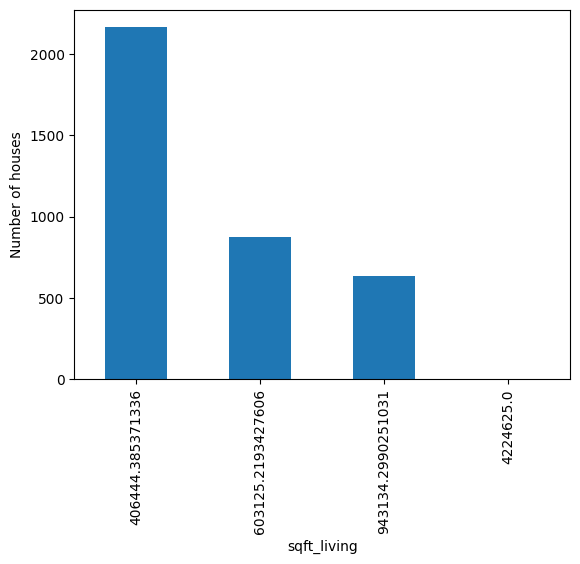

In [ ]:
# with tree discretisation, each bin does not necessarily contain
# the same number of observations.
train_t.groupby('sqft_living')['sqft_living'].count().plot.bar()
plt.ylabel('Number of houses')

### Labelling the bin values

In [ ]:
train_t

In [ ]:
X_train

In [ ]:
unique_vals = train_t['sqft_living'].unique()
unique_vals

array([ 406444.38537134,  603125.21934276,  943134.2990251 ,
       4224625.        ])

In [ ]:
train_t['sqft_living'] = train_t['sqft_living'].apply(lambda x: math.ceil(x))
train_t['sqft_living'] = train_t['sqft_living'].replace(406445, 'very small')
train_t['sqft_living'] = train_t['sqft_living'].replace(4224625, 'small')
train_t['sqft_living'] = train_t['sqft_living'].replace(603126, 'medium')
train_t['sqft_living'] = train_t['sqft_living'].replace(943135, 'biggest')

train_t

,bedrooms,sqft_living,sqft_lot,floors,sqft_above
1144,2.0,very small,564178.377576,1.0,364819.930851
36,2.0,very small,564178.377576,1.0,364819.930851
706,4.0,medium,668334.981932,1.0,642578.233344
1559,3.0,very small,494050.012114,1.0,364819.930851
1349,4.0,medium,494050.012114,1.0,458295.135969
...,...,...,...,...,...
1033,3.0,very small,467476.649490,3.0,458295.135969
3264,2.0,very small,564178.377576,1.0,364819.930851
1653,5.0,very small,668334.981932,2.0,537218.482550
2607,4.0,biggest,668334.981932,1.0,537218.482550


# References
[Decision Tree Discretiser](https://feature-engine.trainindata.com/en/1.0.x/discretisation/DecisionTreeDiscretiser.html)

[The Power of Discretization](https://aitechtrend.com/the-power-of-discretization-techniques-for-improved-machine-learning-performance/)

[Binning](https://www.saedsayad.com/binning.htm)

# Exercise

## Instructions:
1. Fork this repo https://github.com/OG-Habit/4103-reporting-exercises/tree/main \
2. Make a copy of the template.ipynb file \
3. Rename it to {lastname}.ipynb Ex: woogue.ipynb \
4. Place your code accordingly below each section \
5. Push the {lastname}.ipynb file only!!! \

## A. Nonlinear Transformation
  - Refer to this dataset https://www.kaggle.com/datasets/zeesolver/china-gdp
  - Perform nonlinear transformation on "Value" column
  - Follow the steps taken during reporting

## B. Categorical Encoding
  - Refer to this dataset (melb_data.csv) https://www.kaggle.com/datasets/dansbecker/melbourne-housing-snapshot
  - Convert the 3 object type columns into numerical values through categorical encoding
  - You may use any categorical encoding approach, feel free to experiment
  - After, review this link to see a guide on this specific dataset: https://www.kaggle.com/code/alexisbcook/categorical-variables#Conclusion
  
## C. Discretization
  - Refer to this dataset (train.csv) https://www.kaggle.com/competitions/spaceship-titanic/data
  - Focus on the columns with continuous variables
  - Use Equal Frequency Discretization
  - Use this guide for more info https://www.kaggle.com/code/mrbisht/discretization-continuous-variables

\\
### Note: Check the references in each part for more information.